In [1]:
#import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from numpy import exp
import glob
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

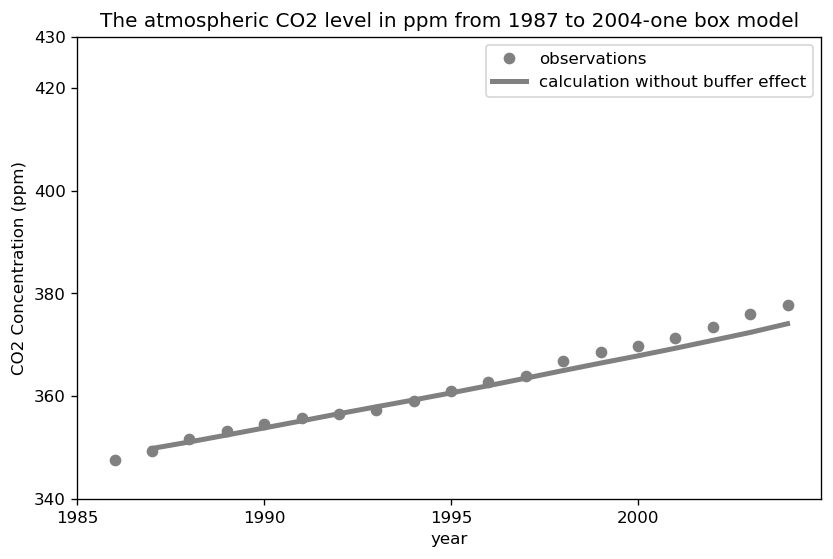

In [2]:
# 1.1
# read the file
df = pd.read_csv("co2_annmean_mlo.csv",skiprows = 55)
CO2=df.loc[ (df['year'] >1985)&(df['year'] <2005)][['year','mean']]

#define γ (This step is taught by Yin Yuling)
def γ(t):
    #get the fossil fuel data
    data = pd.read_csv("global.1751_2008.csv")
    γ=float(data.loc[ (data['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return γ

# Define the function
def model(f, t, k12, k21):
    N1,N2=f
    dfdt = [-k12*N1+k21*N2+γ(t),k12*N1-k21*N2]
    return dfdt

# initial condition
k12, k21 = 105/740, 102/900
N10=740/2.13
N20=900/2.13
y0 = [N10, N20]

# Time points
t = np.linspace(1985,2004,20)

# Solve ODE
from scipy.integrate import odeint
sol = odeint(model, y0, t, args=(k12,k21))

#plot
plt.figure(figsize=(8,5),dpi=120)
plt.plot(CO2['year'], CO2['mean'],'o',c='grey',label='observations', markersize=6)
plt.plot(t[2:], sol[2:,0], c='grey',label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.title('The atmospheric CO2 level in ppm from 1987 to 2004-one box model')
plt.show()


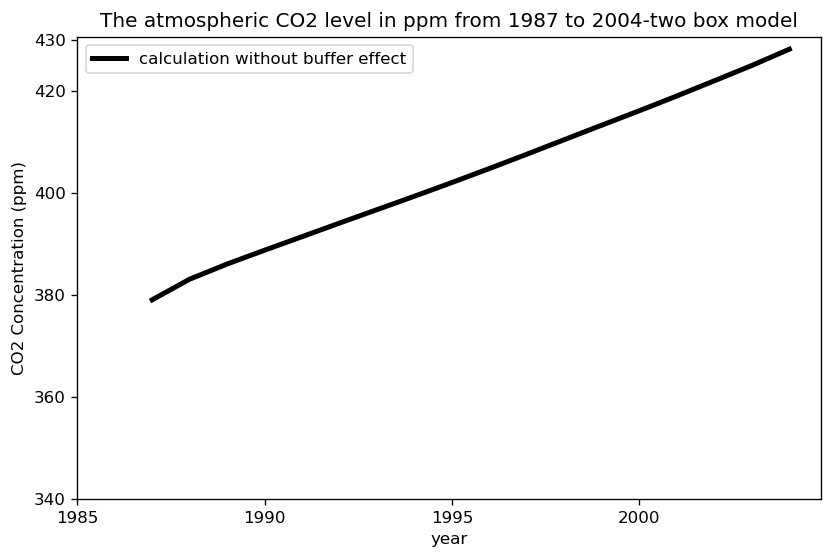

In [3]:
# 1.2
# read the file
data = pd.read_csv("co2_annmean_mlo.csv",skiprows = 55)
CO2=data.loc[ (data['year'] >1985)&(data['year'] <2005)][['year','mean']]

#define γ (the same as 1.1)
def γ(t):
    #get the fossil fuel data
    data2 = pd.read_csv("global.1751_2008.csv")
    γ=float(data2.loc[ (data2['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return γ

#define a
def a(N1):
    a=3.69+1.86*(1e-2)*N1-1.8*(1e-6)*N1*N1
    return a

#define the function
def model2(f, t, k12, k21, N20):
    N1,N2=f
    dfdt = [-k12*N1+k21*(N20+a(N1)*(N2-N20))+γ(t),k12*N1-k21*(N20+a(N1)*(N2-N20))]
    return dfdt

k12 = 105/740
k21 = 102/900
N20 = 821/2.13
f0 = [740/2.13,900/2.13]

# Time points
t = np.linspace(1985,2004,20)

# Solve ODE
sol2 = integrate.odeint(model2, f0, t, args=(k12,k21,N20))

#plot
plt.figure(figsize=(8,5),dpi=120)
#plt.plot(CO2['year'], CO2['mean'],'o',c='grey', label='observations', markersize=6)
plt.plot(t[2:], sol2[2:,0] ,c='k', label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.title('The atmospheric CO2 level in ppm from 1987 to 2004-two box model')
plt.show()

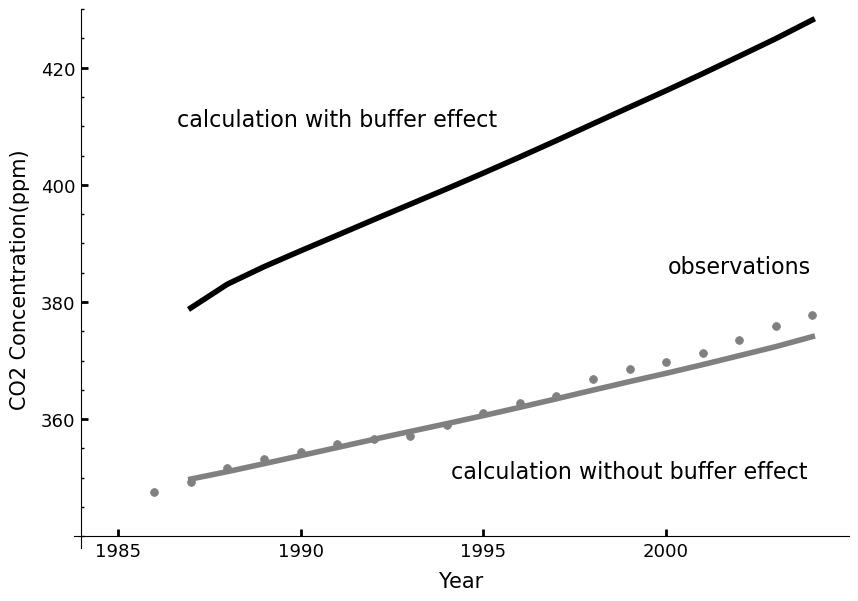

In [4]:
#1.3
# combine the two figures
# set the figure size
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

#Set the scale and ticks of the coordinate axis
plt.xlim(1983.8,2005)
ax.tick_params(axis='x',which='major',direction='in',width=2,length=5, pad=4,labelsize=13)
ax.set_xticks(np.arange(1985, 2000 + 5, 5))
ax.set_xticks(np.arange(180, 180 + 2.5, 2.5), minor=True)
ax.set_xlabel('Year',labelpad=8,fontsize=15)
plt.ylim(338,430)
ax.tick_params(axis='y',which='major',direction='in',width=2,length=5, pad=4,labelsize=13)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.set_yticks(np.arange(360, 420 + 20, 20))
ax.set_yticks(np.arange(340, 430 + 5, 5), minor=True)
ax.set_ylabel('CO2 Concentration(ppm)',labelpad=8,fontsize=15)

#Set the origin of axes and plot it(ask for Yin Yuling)
ax.spines['bottom'].set_position(('data',340))
ax.spines['left'].set_position(('data',1984))
ax.plot(t[2:], sol[2:,0],linewidth=4,color='grey',label='calculation without buffer effect')
ax.plot(t[2:], sol2[2:,0],linewidth=4,color='k',label='calculation with buffer effect')
ax.scatter(CO2['year'], CO2['mean'],s=32,c='grey',marker='o',lw=0.5,label='observations')

#Remove the right border and top border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#add the text
ax.text(1999,350,
        "calculation without buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(1991,410,
        "calculation with buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(2002,385,
        "observations",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
plt.show()

In [5]:
# Bonus
# this is taught by Shao Shi, I think the functions are correct, but somehow it seems that there are some problems. 
# read γ file
gama = np.loadtxt("global.1751_2008.csv", delimiter=",", skiprows = 2, usecols = 1)/10**3
# create year vector
t = np.linspace(1751,2008,258,dtype='int')
# read CO2 observation data 1
co2_1010 = np.loadtxt("co2_1010.csv", delimiter=",", skiprows = 148)
# read CO2 observation data 2
annual_CO2_Obs = np.loadtxt("co2_annmean_mlo.csv", delimiter=",", skiprows = 56 )[:,1]
annual_CO2_Obs_t = np.loadtxt("co2_annmean_mlo.csv", delimiter=",", skiprows = 56 )[:,0]
# read the data of delta
delta = np.empty_like(gama)
delta[0:100] = np.linspace(0.2,0.5,100)
#delta[99:-3]= np.loadtxt("Global_land-use_flux-1850_2005.CSV", delimiter=",", skiprows = 1, usecols = 1)/10**3
delta[-3:] = delta[-4]

In [6]:
# define f
import math
def compute_f(P,β):
    f0=62/2.13
    P0=290.21
    f=f0*(1+β*math.log(P/P0))
    return f

In [7]:
def compute_a(CO2_ppm):
    a = 3.69 + 1.86 * 10**-2 * CO2_ppm - 1.80 * 10**-6 * CO2_ppm**2
    return a 

In [8]:
# delta: emission rate to the atmosphere by changes in land use
def delta(t):
    data_delta = pd.read_csv("Global_land-use_flux-1850_2005.csv")
    delta=float(data_delta.loc[ (data_delta['Year'] ==int(t))]['Global']/1000/2.13)
    return delta

In [9]:
# define function
def model3(N, t, a, γ, f, delta):
    N1,N2,N3,N4,N5,N6,N7=N
    dfdt = [-k12*N1+k21*(N20+a(N1)*(N2-N20))+γ(t)-f(P,β)+delta(t)+k51*N5+k71*N7,
            k12*N1-k21*(N20+a(N1)*(N2-N20))-k23*N2+k32*N3-k24*N2,
            k23*N2-k32*N3-k34*N3+k43*N4,
           k34*N3-k43*N4+k24*N2-k45*N4,
           k45*N4-k51*N5,
           f(P,β)-k67*N6-2*delta(t),
           k67*N6-k71*N7+delta(t)]
    return dNdt

k12 = 60/615
k21 = 60/842
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328
N20 = 821/2.13
N0 = [615/2.13,842/2.13,9744/2.13,26280/2.13,90000000/2.13,731/2.13,1238/2.13]

In [10]:
N1_eq_6_12_beta1 = np.empty_like(t)
N1_eq_6_12_beta2 = np.empty_like(t)

In [11]:
# β = 0.38
β = 0.38
N0 = [615, 842, 9744, 26280, 90000000, 731, 1238]
N1_eq_6_12_beta1[0] = N0[0]
CO2_ppm = N1_eq_6_12_beta1[0]/2.13
a = compute_a(CO2_ppm)
f = compute_f(CO2_ppm,β)
# slove the ODE year by year
for i in range(1,258):
    #set the setp size
    dt = [0,1]    
    # numericly solve the eq.s
    N = odeint(model3,N0,dt,args=(γ(i-1),a,f,delta(i-1)))
    # store the result
    N1_eq_6_12_beta1[i] = N[1][0]    
    # initiation of the next step
    CO2_ppm = N1_eq_6_12_beta1[i]/2.13
    N0 = N[1]
    a = a(CO2_ppm)
    f = compute_f(CO2_ppm,β)
    
plt.plot(t[1:],N1_eq_6_12_beta1[1:]/2.13,label='β = 0.38')
plt.plot(t[1:],N1_eq_6_12_beta2[1:]/2.13,label='β = 0.50')
plt.plot(co2_1010[:,0], co2_1010[:,1],'k.')
plt.plot(annual_CO2_Obs_t,annual_CO2_Obs,'k.',label='observation')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')
plt.legend(loc='best')
my_x_ticks = np.arange(1985,2004,3)
plt.show()

TypeError: cannot convert the series to <class 'float'>